<a href="https://colab.research.google.com/github/Letch49/ML-vvsu-2025-2026/blob/master/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('student_performance.csv')
df.head()

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [51]:
df['grade'] = df.grade.astype('category')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   student_id               1000000 non-null  int64   
 1   weekly_self_study_hours  1000000 non-null  float64 
 2   attendance_percentage    1000000 non-null  float64 
 3   class_participation      1000000 non-null  float64 
 4   total_score              1000000 non-null  float64 
 5   grade                    1000000 non-null  category
dtypes: category(1), float64(4), int64(1)
memory usage: 39.1 MB


### EDA

In [53]:
y = df.total_score
X = df.drop(['total_score', 'student_id', 'grade'], axis=1)
X

,weekly_self_study_hours,attendance_percentage,class_participation
0,18.5,95.6,3.8
1,14.0,80.0,2.5
2,19.5,86.3,5.3
3,25.7,70.2,7.0
4,13.4,81.9,6.9
...,...,...,...
999995,18.0,95.5,4.8
999996,15.7,82.7,6.7
999997,14.2,85.1,5.8
999998,25.3,90.0,5.3


In [54]:
best_features = ['attendance_percentage', 'weekly_self_study_hours']

In [63]:
medi = df['total_score'].median()
df['total_score_level'] = df['total_score'].apply(
    lambda x: 'high' if x > medi else 'low'
)
df[['total_score_level', 'total_score']]

,total_score_level,total_score
0,high,97.9
1,low,83.9
2,high,100.0
3,high,100.0
4,high,92.0
...,...,...
999995,high,100.0
999996,high,88.3
999997,high,87.9
999998,high,100.0


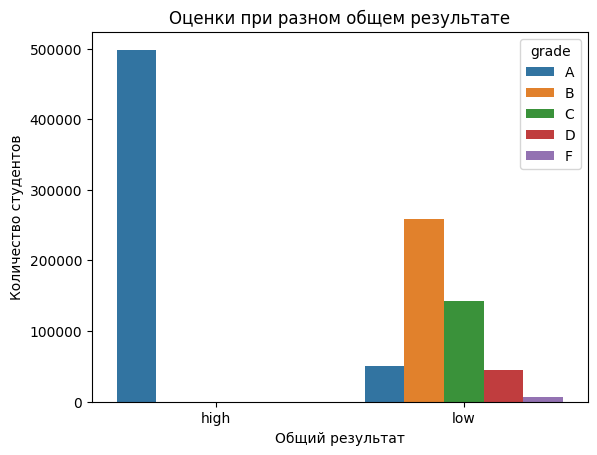

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# визуализируем различия alcohol_level и qualuty
sns.countplot(data=df, x='total_score_level', hue='grade')
plt.title('Оценки при разном общем результате')
plt.xlabel('Общий результат')
plt.ylabel('Количество студентов')
plt.show()

In [70]:
table = pd.crosstab(df['total_score_level'], df['grade'])
table

grade,A,B,C,D,F
total_score_level,,,,,
high,498445,0,0,0,0
low,50199,258174,141980,44998,6204


### Окак
Проверим Хи

In [73]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

χ² = 817574.36
p-value = 0.0


### 0000000как

### Model

In [66]:
from sklearn.linear_model import LogisticRegression

In [77]:
y = df['total_score_level']
X = df[best_features]
X

,attendance_percentage,weekly_self_study_hours
0,95.6,18.5
1,80.0,14.0
2,86.3,19.5
3,70.2,25.7
4,81.9,13.4
...,...,...
999995,95.5,18.0
999996,82.7,15.7
999997,85.1,14.2
999998,90.0,25.3


In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
